## KNN (k- nearest neighbours)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

There are two types of distances pythagorean L2 distance and L1- Manhattan distance. L2 is normal distance formula : $$\sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$ and L1 is just : $$(\lvert{x_2 - x_1}\rvert + \lvert{y_2 - y_1}\rvert)$$

In [5]:
a = np.asarray([2,3,1])
b = np.asarray([1,4,8])

l2 = np.sum((b-a)**2)**0.5 #pythagorean
l1 = np.sum(abs(b-a)) #manhattan
print(l2,l1)

7.14142842854285 9


In [20]:
mean1 = np.array([1, 0])
cov1 = np.array([[1, 1.0], [0.1, 1.2]])
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
print(dist1.shape)

mean2 = np.array([4,5])
cov2 = np.array([[1, 1.0], [0.1, 1.2]])
dist2 = np.random.multivariate_normal(mean2, cov2, 500)
print(dist1.shape)


(500, 2)
(500, 2)


<ipython-input-20-04ebb8984ac0>:3: RuntimeWarning: covariance is not positive-semidefinite.
  dist1 = np.random.multivariate_normal(mean1, cov1, 500)
<ipython-input-20-04ebb8984ac0>:8: RuntimeWarning: covariance is not positive-semidefinite.
  dist2 = np.random.multivariate_normal(mean2, cov2, 500)


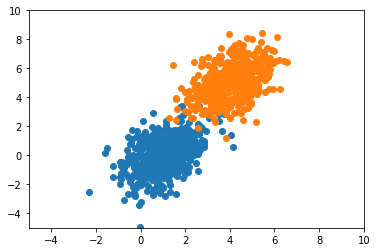

In [22]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:, 0], dist1[: ,1])
plt.scatter(dist2[:, 0], dist2[: ,1])
plt.show()

In [23]:
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, 2] = 1

In [25]:
data.shape

(1000, 3)

In [26]:
data.mean(axis=0)

array([2.52821376, 2.55278819, 0.5       ])

In [27]:
def distance(a, b):
    return np.sum((a-b)**2)**0.5

In [30]:
np.random.shuffle(data)
data[:10]

array([[-0.19870504, -0.19428268,  0.        ],
       [ 4.02224523,  5.38729357,  1.        ],
       [-0.55101574, -1.46330243,  0.        ],
       [ 4.42769165,  6.0459491 ,  1.        ],
       [-0.35677609,  0.0208975 ,  0.        ],
       [ 0.51224434,  0.40989699,  0.        ],
       [ 4.8548411 ,  6.14585577,  1.        ],
       [ 3.15138318,  4.82421808,  1.        ],
       [-0.24142128, -0.34414449,  0.        ],
       [ 0.09629161, -0.81353269,  0.        ]])

In [31]:
x_train = data[:750, :2]
y_train = data[:750, -1]

x_test = data[750:, :2]
y_test = data[750:, -1]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [74]:
def knn(x_train, y_train, test_point, k=7):
    m = x_train.shape[0]
    distances =  [] #np.zeros((m, 2))
    for i in range(m):
        d = distance(test_point, x_train[i])
        distances.append([d, y_train[i]])
#     distances[:, 0]  = distance(test_point, x_train)
#     distances[:, 1] = y_train
#     print(distances)
    sorted_labels = sorted(distances, key=lambda r: r[0])
    neighbours = np.asarray(sorted_labels)[:k, -1]
#     print(neighbours)
    freq = np.unique(neighbours, return_counts=True)
    index = freq[1].argmax()
    return freq[0][index]

In [70]:
test_point = np.array([2,3])
knn(x_train, y_train, test_point, k=5)

[1. 1. 0. 0. 1.]


1.0

In [78]:
def accuracy(k):
    pred = []
    m =x_test.shape[0]
    for i in range(m):
        test_point = x_test[i]
        pred_label = knn(x_train, y_train, test_point, k)
        pred.append(pred_label)
    
    pred = np.asarray(pred)
    return 100 * (pred == y_test).sum() / m
    

In [81]:
for k in range(1, 10):
    print(accuracy(7))

99.2
99.2
99.2
99.2
99.2
99.2
99.2
99.2
99.2


In [83]:
# ! pip install scikit-learn

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train ,y_train)
# print(knn.predict(x_test))
knn.score(x_test, y_test)*100

99.2

## Handwritten Number Recognition

In [88]:
from sklearn.datasets import load_digits

In [90]:
dataset = load_digits()

In [91]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [92]:
dataset['images'].shape

(1797, 8, 8)

In [95]:
dataset['data'].shape

(1797, 64)

In [98]:
dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

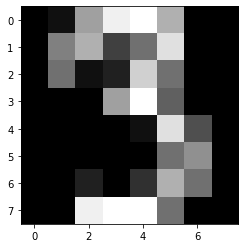

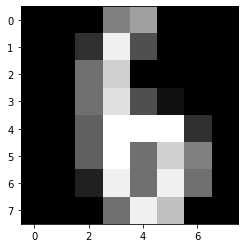

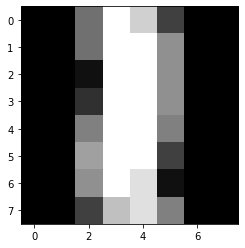

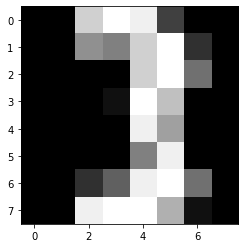

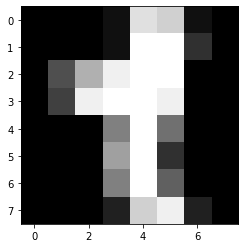

In [110]:
import random
r = [random.randint(0, 1797) for i in range(5)]
for i in range(len(r)):
    plt.imshow(dataset['images'][r[i]], cmap='gray')
    plt.show()

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'])

In [113]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [115]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
knn.score(X_test, y_test)

[2 9 6 7 1 5 2 0 8 6 5 4 3 1 0 1 2 7 2 2 3 9 6 4 7 4 2 4 4 4 1 7 7 1 4 0 5
 4 9 1 1 3 4 7 9 7 3 2 6 5 9 6 1 6 9 8 7 1 2 2 1 3 5 7 3 7 9 8 2 0 1 1 8 1
 8 8 6 0 5 6 7 5 3 8 2 2 7 8 5 7 7 7 3 6 1 5 4 2 4 8 6 7 5 4 4 6 8 0 6 7 3
 0 1 4 1 6 5 6 8 5 9 2 0 6 7 8 8 4 4 5 6 4 7 7 4 8 0 6 6 6 5 3 6 5 0 3 5 5
 3 4 6 1 0 0 8 4 1 0 3 8 4 0 8 1 3 0 1 7 8 3 4 8 4 3 3 8 6 5 9 9 9 2 2 4 6
 1 9 5 5 2 1 1 4 1 4 5 6 2 4 2 7 7 4 9 6 9 1 1 0 0 9 6 9 3 7 0 2 5 2 4 8 4
 3 1 7 3 6 8 6 3 4 7 1 8 7 0 2 6 5 4 0 9 3 8 2 7 1 8 8 5 2 7 1 0 9 6 7 6 7
 2 7 4 2 7 1 6 2 1 8 8 5 2 4 3 8 1 9 6 3 6 1 4 9 6 6 3 8 3 0 7 4 9 4 8 7 3
 0 1 1 4 2 7 6 1 6 0 2 7 3 0 8 4 8 5 6 0 3 3 1 9 5 7 2 7 5 5 9 2 7 2 3 3 4
 9 1 1 3 0 9 0 9 5 8 5 0 8 9 1 7 7 7 6 5 3 6 1 6 8 0 1 3 7 2 0 8 6 3 7 6 8
 7 4 5 0 1 5 9 5 3 5 7 7 9 3 1 4 6 2 3 3 9 0 8 3 7 6 8 6 2 2 5 6 2 2 2 5 3
 4 4 3 0 2 6 8 5 1 5 0 0 3 1 9 3 4 0 5 2 6 5 4 6 1 5 5 5 4 9 5 3 5 9 0 8 4
 9 6 0 0 4 9]


0.9822222222222222

In [1]:
y_test[-1]

NameError: name 'y_test' is not defined

For Hyperparameter tuning we have two methods Linear Search and Binary Search. We run a for loop for a range of k values. Random Search is the most used tuning method.